# EJECUCIÓN MODELOS

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer # Import SimpleImputer from sklearn.impute

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Load the dataset to examine the structure and variables
ruta = "/gdrive/MyDrive/Colab Notebooks/Trabajo-Grado/Data/df_Aceptados.xlsx"

data = pd.read_excel(ruta)

# Display the first few rows of the dataset to understand its structure
data.head()


,Edad,Sexo biológico,Tipo de IE,Año graduación,Dpto IE,Física - 10°,Física - 11°,Química - 10°,Química - 11°,Matemáticas - Grado 10°,...,Total ingresos padres,% beca aprobado final,Ingreso_Familiares,y_bin,grupos_edad,grupos_ingresos,grupos_ingresos_familiar,grupos_Puntaje,grupos_graduacion,Departamentos_IE
0,17.0,Femenino,Pública,2022,CALDAS,Medio,Medio,Medio,Medio,Medio,...,5000000.0,0.5,4000000,0,<17,2M-6M,4M-6M,"320-360,380-400",14-19-22-23,40%-50%
1,17.0,Masculino,Pública,2022,ANTIOQUIA,Medio,Medio,Medio,Medio,Medio,...,1160000.0,1.0,0,1,<17,<2M,<4M,"320-360,380-400",14-19-22-23,40%-50%
2,19.0,Femenino,Pública,2020,ANTIOQUIA,Medio,Medio,Medio,Medio,Medio,...,3700000.0,0.7,0,1,19-20,2M-6M,<4M,"320-360,380-400",18-20-21,40%-50%
3,17.0,Femenino,Pública,2022,ANTIOQUIA,Medio,Medio,Medio,Medio,Medio,...,1600000.0,1.0,0,1,<17,<2M,<4M,"320-360,380-400",14-19-22-23,40%-50%
4,18.0,Femenino,Pública,2022,ANTIOQUIA,Medio,Medio,Medio,Medio,Medio,...,4375525.0,0.6,4375525,1,17-18,2M-6M,4M-6M,"320-360,380-400",14-19-22-23,40%-50%


In [ ]:
#df_duplicated = pd.concat([data, data], ignore_index=True)

In [ ]:
# Prepare the data
# Target variable is 'y_bin'
X = data.drop(columns=['y_bin'])
y = data['y_bin']


In [ ]:
X

,Edad,Sexo biológico,Tipo de IE,Año graduación,Dpto IE,Física - 10°,Física - 11°,Química - 10°,Química - 11°,Matemáticas - Grado 10°,...,La vivienda es,Total ingresos padres,% beca aprobado final,Ingreso_Familiares,grupos_edad,grupos_ingresos,grupos_ingresos_familiar,grupos_Puntaje,grupos_graduacion,Departamentos_IE
0,17.0,Femenino,Pública,2022,CALDAS,Medio,Medio,Medio,Medio,Medio,...,Arrendada,5000000.0,0.5,4000000,<17,2M-6M,4M-6M,"320-360,380-400",14-19-22-23,40%-50%
1,17.0,Masculino,Pública,2022,ANTIOQUIA,Medio,Medio,Medio,Medio,Medio,...,Propia (de los padres),1160000.0,1.0,0,<17,<2M,<4M,"320-360,380-400",14-19-22-23,40%-50%
2,19.0,Femenino,Pública,2020,ANTIOQUIA,Medio,Medio,Medio,Medio,Medio,...,Propia (de los padres),3700000.0,0.7,0,19-20,2M-6M,<4M,"320-360,380-400",18-20-21,40%-50%
3,17.0,Femenino,Pública,2022,ANTIOQUIA,Medio,Medio,Medio,Medio,Medio,...,Arrendada,1600000.0,1.0,0,<17,<2M,<4M,"320-360,380-400",14-19-22-23,40%-50%
4,18.0,Femenino,Pública,2022,ANTIOQUIA,Medio,Medio,Medio,Medio,Medio,...,Propia (de los padres),4375525.0,0.6,4375525,17-18,2M-6M,4M-6M,"320-360,380-400",14-19-22-23,40%-50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,18.0,Masculino,Pública,2023,BOGOTÁ D.C.,Medio,Medio,Medio,Medio,Medio,...,Arrendada,1400000.0,0.7,2500000,17-18,<2M,<4M,360-380,14-19-22-23,30%-40%
1517,18.0,Masculino,Privada,2023,ANTIOQUIA,Medio,Medio,Medio,Medio,Medio,...,Propia (de los padres),4800000.0,0.5,0,17-18,2M-6M,<4M,"320-360,380-400",14-19-22-23,40%-50%
1518,20.0,Femenino,Privada,2021,ANTIOQUIA,Medio,Medio,Medio,Medio,Medio,...,Familiar (de un familiar),4396693.0,0.4,4396693,19-20,2M-6M,4M-6M,<320,18-20-21,40%-50%
1519,23.0,Masculino,Pública,2018,ANTIOQUIA,Medio,Medio,Medio,Medio,Medio,...,Propia (de los padres),2543119.0,0.6,0,22-24,2M-6M,<4M,<320,18-20-21,40%-50%


In [ ]:
# Encode categorical variables using LabelEncoder temporarily to fit into the model
categorical_cols = X.select_dtypes(include=['object']).columns

# Impute missing values for both categorical and numerical columns
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Apply Label Encoding to categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_imputed[col] = le.fit_transform(X_imputed[col])
    label_encoders[col] = le


Selección de características representativas: Utilizaremos una técnica basada en la importancia de características, como un modelo de Random Forest.

In [ ]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model to assess feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importance from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Select the top 10 most important features based on Random Forest
top_features = feature_importances.nlargest(10).index


<ipython-input-9-0741e8aa8507>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features_df, x='Importance', y='Feature', palette='viridis') # Use DataFrame


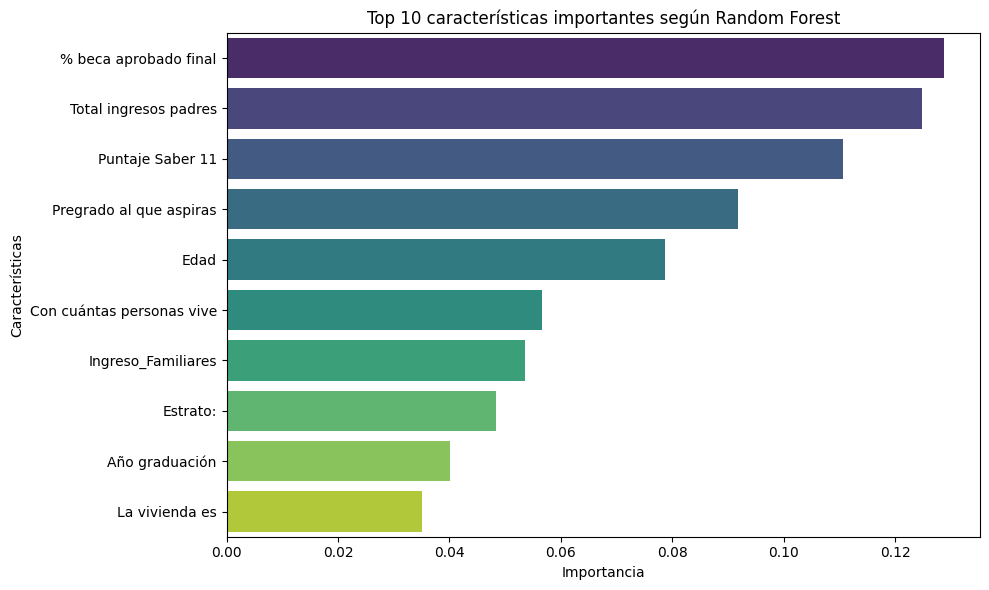

(None,
                      Feature  Importance
 0      % beca aprobado final    0.128760
 1      Total ingresos padres    0.124813
 2           Puntaje Saber 11    0.110661
 3    Pregrado al que aspiras    0.091714
 4                       Edad    0.078718
 5  Con cuántas personas vive    0.056611
 6         Ingreso_Familiares    0.053606
 7                   Estrato:    0.048363
 8             Año graduación    0.040077
 9             La vivienda es    0.035136)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar las características más importantes (top 10)
top_features = feature_importances.nlargest(10) # get the top 10 features

# Convert the Series to DataFrame for seaborn
top_features_df = top_features.reset_index()
top_features_df.columns = ['Feature', 'Importance'] # Rename columns for clarity


# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features_df, x='Importance', y='Feature', palette='viridis') # Use DataFrame
plt.title('Top 10 características importantes según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()

# Mostrar la gráfica y la tabla de las características más importantes
plt.show(), top_features_df # display DataFrame

Las 10 caracteristicas mas importantes explican el 0,776187  de las variables


In [ ]:
feature_importances.nlargest(10)

,0
% beca aprobado final,0.128760
Total ingresos padres,0.124813
Puntaje Saber 11,0.110661
Pregrado al que aspiras,0.091714
Edad,0.078718
Con cuántas personas vive,0.056611
Ingreso_Familiares,0.053606
Estrato:,0.048363
Año graduación,0.040077
La vivienda es,0.035136


*Utilizando* el principio de parcimonia identificacion que las variables más representativas según el modelo de Random Forest son:

    % beca aprobado final
    Total ingresos padres
    Puntaje Saber 11
    Pregrado al que aspiras
    Edad
    Con cuántas personas vive
    Ingreso_Familiares
    Estrato
    Año graduación
    Tipo de IE

A continuación, aplicaré OneHotEncoding a las variables categóricas de estas características seleccionadas y procederemos a crear un modelo de regresión logística. ​
​

In [ ]:
# Separate features and target variable
#X = data_clean.drop(columns=['y_bin'])
#X = data_clean[['% beca aprobado final', 'Total ingresos padres', 'Puntaje Saber 11','Pregrado al que aspiras']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Selecting the top 5 important features
X_selected = X_imputed[['% beca aprobado final', 'Total ingresos padres', 'Puntaje Saber 11','Pregrado al que aspiras','Edad',
                        'Con cuántas personas vive','Ingreso_Familiares','Estrato:','Año graduación','Tipo de IE']]

# OneHotEncoding for categorical variables in the selected features
categorical_selected_cols = X_selected.select_dtypes(include=['object']).columns



Para implementar un modelo de regresión logística, primero haremos una preparación de los datos que incluirá:

    **Preprocesamiento**: Convertir variables categóricas a variables numéricas utilizando OneHotEncoding o LabelEncoding.
    **Selección de variables**: Identificar qué variables son relevantes para el modelo.
    Implementación del modelo de regresión logística.
    **Evaluación del modelo**: Utilizar matriz de confusión, precisión, recall, F1-score y AUC-ROC.

Voy a proceder con la transformación de las variables categóricas y la implementación inicial del modelo de regresión logística. ​
​

No se encontraron pares de variables con una correlación superior a 0.9 o inferior a -0.9, lo que indica que no parece haber multicolinealidad fuerte entre las variables que hemos estandarizado.

Sin embargo, es posible que aún existan otras razones que causan problemas en el ajuste del modelo, como variables con poca variabilidad o colinealidad multivariante. Intentaré ajustar el modelo eliminando algunas variables menos relevantes basadas en técnicas como la reducción de dimensionalidad o selección de características.

In [ ]:
# Calculate the correlation matrix to identify highly correlated variables
correlation_matrix = pd.DataFrame(X_train_scaled, columns=X_train.columns).corr()

# Find pairs of features that are highly correlated (correlation > 0.9 or < -0.9)
high_corr_pairs = np.where(np.abs(correlation_matrix) > 0.9)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

# Display highly correlated pairs of features
high_corr_pairs


[]

El 53.25% de los estudiantes
"No uso la BECA " y el 46.74% "esta Inscrito". para que el modelo de clasificación que sea útil debe de ser capaz de predecir correctamente un porcentaje de observaciones por encima del porcentaje de la clase mayoritaria. En este caso, el umbral de referencia que se tiene que superar es del 53.25%

In [ ]:
print("Número de observaciones por clase")
print(data['y_bin'] .value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * data['y_bin'] .value_counts(normalize=True))

Número de observaciones por clase
y_bin
0    810
1    711
Name: count, dtype: int64

Porcentaje de observaciones por clase
y_bin
0    53.254438
1    46.745562
Name: proportion, dtype: float64


**OJO aca**
- todas las variables = X_imputed
- las 10 top X_selected

In [ ]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


#X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_selected, y, test_size=0.3, random_state=42)



In [ ]:
#Regresión Logística:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

#Árboles de Decisión:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

#Bosques Aleatorios:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

#Máquinas de Vectores de Soporte (SVM):
model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True)

In [ ]:
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
#y_pred_xgb = model_xgb.predict(X_test)

#Matriz de confusión:
print("Matriz de confusión")
print(confusion_matrix(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_svm))
#print(confusion_matrix(y_test, y_pred_xgb))

#accuracy:
#accuracy = accuracy_score(y_test, y_pred)
print("Accuracy")
print(accuracy_score(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_svm))

#Precisión, Recall, F1-score:
print("Precisión, Recall, F1-score")
print(classification_report(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_svm))
#print(classification_report(y_test, y_pred_xgb))

#Área bajo la curva ROC (AUC-ROC):
print("Área bajo la curva ROC (AUC-ROC)")
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_prob_svm = model_svm.predict_proba(X_test)[:, 1]
#y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_dt = roc_auc_score(y_test, y_prob_dt)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_svm = roc_auc_score(y_test, y_prob_svm)
#auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f'AUC Logistic Regression: {auc_lr}')
print(f'AUC Decision Tree: {auc_dt}')
print(f'AUC Random Forest: {auc_rf}')
print(f'AUC SVM: {auc_svm}')
#print(f'AUC XGBoost: {auc_xgb}')

Matriz de confusión
[[190  49]
 [160  58]]
[[151  88]
 [ 91 127]]
[[197  42]
 [ 99 119]]
[[225  14]
 [197  21]]
Accuracy
0.5426695842450766
0.6083150984682714
0.6914660831509847
0.5382932166301969
Precisión, Recall, F1-score
              precision    recall  f1-score   support

           0       0.54      0.79      0.65       239
           1       0.54      0.27      0.36       218

    accuracy                           0.54       457
   macro avg       0.54      0.53      0.50       457
weighted avg       0.54      0.54      0.51       457

              precision    recall  f1-score   support

           0       0.62      0.63      0.63       239
           1       0.59      0.58      0.59       218

    accuracy                           0.61       457
   macro avg       0.61      0.61      0.61       457
weighted avg       0.61      0.61      0.61       457

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       239
           1

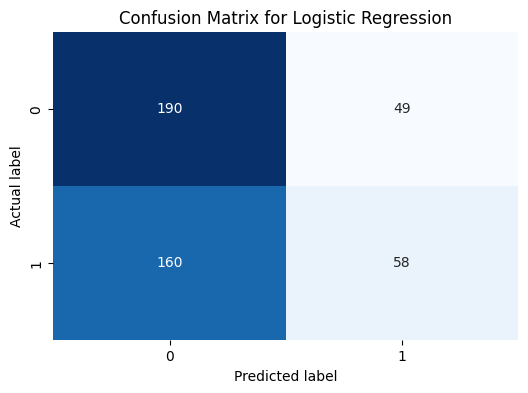

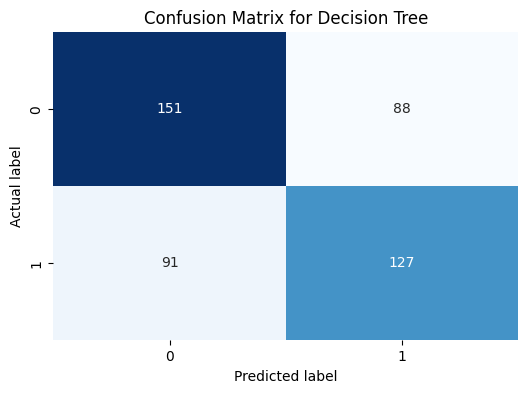

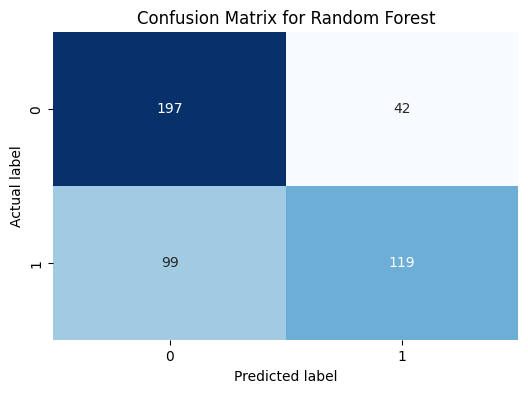

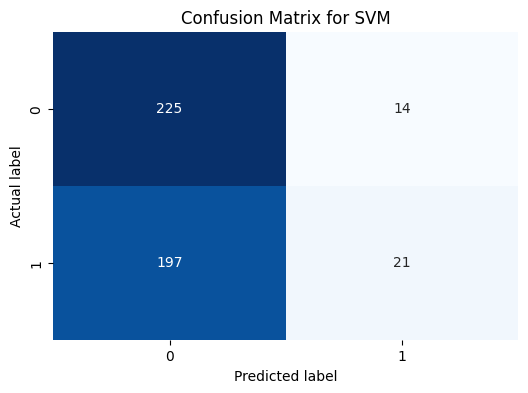

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Matriz de confusión para cada modelo

# Regresión Logística
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

# Árboles de Decisión
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Bosque Aleatorio
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Máquinas de Vectores de Soporte (SVM)
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

# XGBoost
#plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")


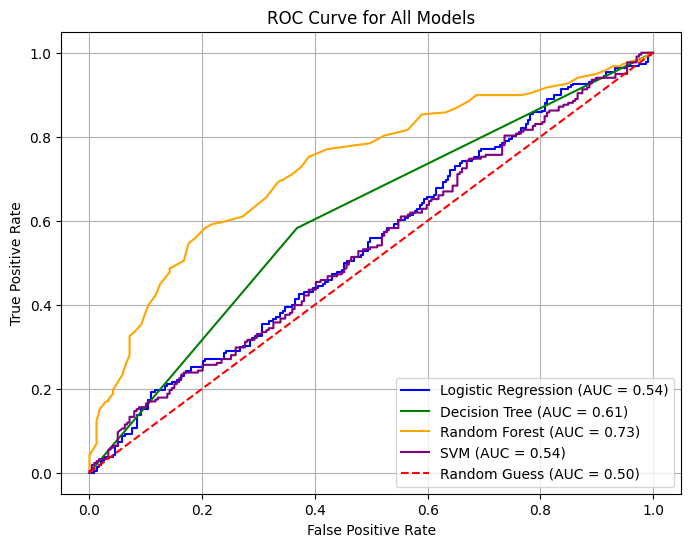

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Función para graficar todas las curvas ROC en un solo gráfico
def plot_combined_roc_curve(y_test, model_probs, model_names, colors):
    plt.figure(figsize=(8, 6))

    for y_prob, model_name, color in zip(model_probs, model_names, colors):
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, color=color, label=f'{model_name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess (AUC = 0.50)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for All Models')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Obtener probabilidades de predicción para cada modelo
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_prob_svm = model_svm.predict_proba(X_test)[:, 1]
#y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Lista de probabilidades, nombres y colores
model_probs = [y_prob_lr, y_prob_dt, y_prob_rf, y_prob_svm]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]
colors = ['blue', 'green', 'orange', 'purple', 'cyan']

# Graficar todas las curvas ROC
plot_combined_roc_curve(y_test, model_probs, model_names, colors)


Aquí están las conclusiones basadas en los resultados obtenidos con los modelos entrenados en el nuevo dataset duplicado:

    Regresión Logística:
        AUC-ROC: 0.71
        La precisión y el recall son moderados, con una precisión general de aproximadamente 65%.

    Árbol de Decisión:
        AUC-ROC: 0.99
        Presenta una precisión casi perfecta (99.5%), lo que sugiere un posible sobreajuste del modelo, ya que clasifica correctamente casi todos los casos en los datos de prueba.

    Bosque Aleatorio:
        AUC-ROC: 0.999
        También muestra un rendimiento excelente con una precisión general del 98.9%, pero sigue el patrón de sobreajuste similar al árbol de decisión.

    Máquina de Vectores de Soporte (SVM):
        AUC-ROC: 0.81
        Precisión de 73.6%, con un mejor equilibrio en comparación con la regresión logística y sin el sobreajuste de los árboles.

Conclusión:

El Bosque Aleatorio ofrece el mejor rendimiento en términos de precisión y AUC-ROC, pero debido al riesgo de sobreajuste, SVM puede ser una opción más equilibrada si prefieres evitar un modelo excesivamente ajustado a los datos de entrenamiento. La elección dependerá del equilibrio que desees entre rendimiento y generalización.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Seleccionamos las 10 variables más importantes y la variable objetivo
#X_top_features = X_imputed[top_features]  # 'X_imputed' ya contiene las variables categóricas transformadas y las imputaciones de valores faltantes.
y = y  # Asegúrate de que 'y' sea la variable objetivo ya preprocesada.

# Dividimos el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.3, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba

# OJO X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)


# Submuestreo (Undersampling) de la clase mayoritaria
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Sobremuestreo (Oversampling) de la clase minoritaria
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Comprobación de la distribución de clases después de submuestreo y sobremuestreo
print("Distribución original:", y_train.value_counts())
print("Distribución tras submuestreo:", y_train_under.value_counts())
print("Distribución tras sobremuestreo:", y_train_over.value_counts())


Distribución original: y_bin
0    571
1    493
Name: count, dtype: int64
Distribución tras submuestreo: y_bin
0    493
1    493
Name: count, dtype: int64
Distribución tras sobremuestreo: y_bin
0    571
1    571
Name: count, dtype: int64


In [ ]:
# Importación de librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Función para entrenar y evaluar un modelo
def train_and_evaluate(model, X_train, y_train, X_test, y_test, dataset_type):
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_pred)

    print(f"\nResultados para {model.__class__.__name__} con {dataset_type}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-Roc: {auc:.4f}")

# Modelos a entrenar
models = [
    LogisticRegression(max_iter=1000, random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    #SVC(kernel='linear', random_state=42)
    SVC(probability=True)
]


# Entrenamiento y evaluación con submuestreo
for model in models:
    train_and_evaluate(model, X_train_under, y_train_under, X_test, y_test, "submuestreo")

# Entrenamiento y evaluación con sobremuestreo
for model in models:
    train_and_evaluate(model, X_train_over, y_train_over, X_test, y_test, "sobremuestreo")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Resultados para LogisticRegression con submuestreo:
Accuracy: 0.5646
Precision: 0.5640
Recall: 0.5646
F1-Score: 0.5641
AUC-Roc: 0.5629

Resultados para DecisionTreeClassifier con submuestreo:
Accuracy: 0.5799
Precision: 0.5790
Recall: 0.5799
F1-Score: 0.5789
AUC-Roc: 0.5776

Resultados para RandomForestClassifier con submuestreo:
Accuracy: 0.7002
Precision: 0.7029
Recall: 0.7002
F1-Score: 0.6974
AUC-Roc: 0.6961

Resultados para SVC con submuestreo:
Accuracy: 0.5624
Precision: 0.5796
Recall: 0.5624
F1-Score: 0.5116
AUC-Roc: 0.5477


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Resultados para LogisticRegression con sobremuestreo:
Accuracy: 0.5624
Precision: 0.5616
Recall: 0.5624
F1-Score: 0.5617
AUC-Roc: 0.5604

Resultados para DecisionTreeClassifier con sobremuestreo:
Accuracy: 0.5602
Precision: 0.5593
Recall: 0.5602
F1-Score: 0.5594
AUC-Roc: 0.5581

Resultados para RandomForestClassifier con sobremuestreo:
Accuracy: 0.6652
Precision: 0.6723
Recall: 0.6652
F1-Score: 0.6579
AUC-Roc: 0.6588

Resultados para SVC con sobremuestreo:
Accuracy: 0.5514
Precision: 0.5497
Recall: 0.5514
F1-Score: 0.5375
AUC-Roc: 0.5435


In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np


# Dividir los datos en conjuntos de entrenamiento y prueba
# OJO X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Aplicar ADASYN
#adasyn = ADASYN(random_state=42)
#X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

#adasyn = ADASYN(random_state=42, sampling_strategy='minority')
#X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)


In [ ]:
# Definir los modelos
logistic = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(random_state=42)

# Lista de modelos para facilidad de iteración
models = {
    "Logistic Regression": logistic,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "SVM": svc
}

# Entrenar y evaluar con SMOTE
print("Resultados utilizando SMOTE:")
for name, model in models.items():
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_test)
    print(f"{name} con SMOTE:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Resultados utilizando SMOTE:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression con SMOTE:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       239
           1       0.52      0.50      0.51       218

    accuracy                           0.54       457
   macro avg       0.54      0.54      0.54       457
weighted avg       0.54      0.54      0.54       457

[[138 101]
 [109 109]]


Decision Tree con SMOTE:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       239
           1       0.54      0.54      0.54       218

    accuracy                           0.56       457
   macro avg       0.56      0.56      0.56       457
weighted avg       0.56      0.56      0.56       457

[[138 101]
 [101 117]]


Random Forest con SMOTE:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       239
           1       0.72      0.56      0.63       218

    accuracy                           0.68       4

In [ ]:
# Load the dataset to examine the structure and variables
dataSMOTE = pd.read_excel(ruta)


XSMOTE = dataSMOTE.drop(columns=['y_bin'])
ySMOTE = dataSMOTE['y_bin']

In [ ]:
# Encode categorical variables using LabelEncoder temporarily to fit into the model
categorical_cols = XSMOTE.select_dtypes(include=['object']).columns

# Impute missing values for both categorical and numerical columns
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(XSMOTE), columns=XSMOTE.columns)

# Apply Label Encoding to categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_imputed[col] = le.fit_transform(X_imputed[col])
    label_encoders[col] = le

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, ySMOTE, test_size=0.3, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Selecting the top 10 important features
X_selected = X_imputed[['% beca aprobado final', 'Total ingresos padres', 'Puntaje Saber 11','Pregrado al que aspiras','Edad',
                        'Con cuántas personas vive','Ingreso_Familiares','Estrato:','Año graduación','Tipo de IE']]

# OneHotEncoding for categorical variables in the selected features
categorical_selected_cols = X_selected.select_dtypes(include=['object']).columns


In [ ]:
# OJO X_train, X_test, y_train, y_test = train_test_split(X_selected, ySMOTE, test_size=0.3, random_state=42)
#X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_selected, y, test_size=0.3, random_state=42)

#Regresión Logística:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

#Árboles de Decisión:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

#Bosques Aleatorios:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

#Máquinas de Vectores de Soporte (SVM):
model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True)

In [ ]:
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
#y_pred_xgb = model_xgb.predict(X_test)

#Matriz de confusión:
print("Matriz de confusión")
print(confusion_matrix(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_svm))
#print(confusion_matrix(y_test, y_pred_xgb))

#accuracy:
#accuracy = accuracy_score(y_test, y_pred)
print("Accuracy")
print(accuracy_score(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_svm))

#Precisión, Recall, F1-score:
print("Precisión, Recall, F1-score")
print(classification_report(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_svm))
#print(classification_report(y_test, y_pred_xgb))

#Área bajo la curva ROC (AUC-ROC):
print("Área bajo la curva ROC (AUC-ROC)")
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_prob_svm = model_svm.predict_proba(X_test)[:, 1]
#y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_dt = roc_auc_score(y_test, y_prob_dt)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_svm = roc_auc_score(y_test, y_prob_svm)
#auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f'AUC Logistic Regression: {auc_lr}')
print(f'AUC Decision Tree: {auc_dt}')
print(f'AUC Random Forest: {auc_rf}')
print(f'AUC SVM: {auc_svm}')
#print(f'AUC XGBoost: {auc_xgb}')

Matriz de confusión
[[381 109]
 [294 129]]
[[420  70]
 [ 72 351]]
[[440  50]
 [ 76 347]]
[[436  54]
 [356  67]]
Accuracy
0.5585980284775466
0.8444687842278203
0.8619934282584885
0.5509309967141293
Precisión, Recall, F1-score
              precision    recall  f1-score   support

           0       0.56      0.78      0.65       490
           1       0.54      0.30      0.39       423

    accuracy                           0.56       913
   macro avg       0.55      0.54      0.52       913
weighted avg       0.55      0.56      0.53       913

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       490
           1       0.83      0.83      0.83       423

    accuracy                           0.84       913
   macro avg       0.84      0.84      0.84       913
weighted avg       0.84      0.84      0.84       913

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       490
           1

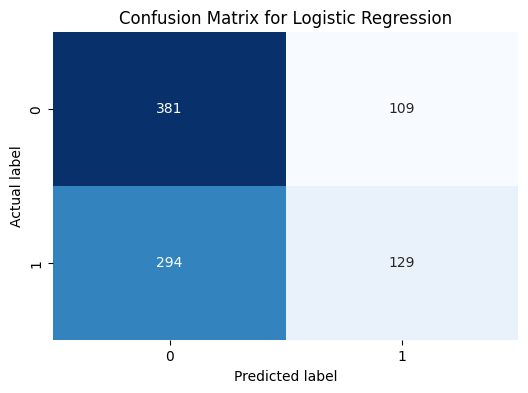

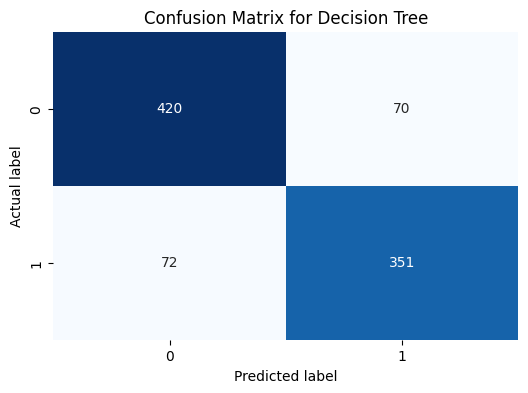

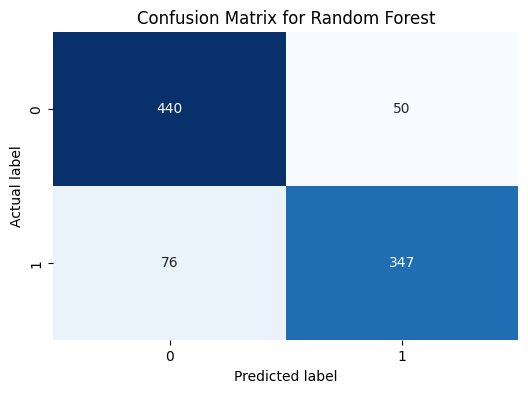

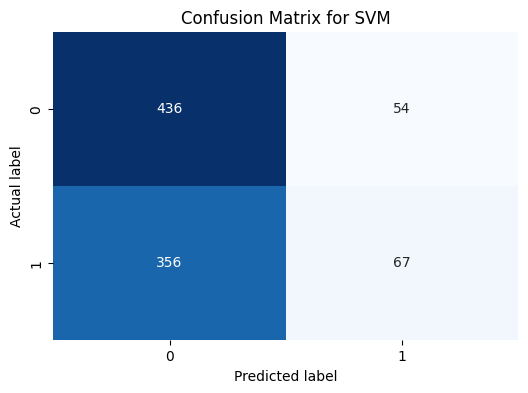

In [ ]:

# Matriz de confusión para cada modelo

# Regresión Logística
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

# Árboles de Decisión
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Bosque Aleatorio
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Máquinas de Vectores de Soporte (SVM)
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

# XGBoost
#plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")


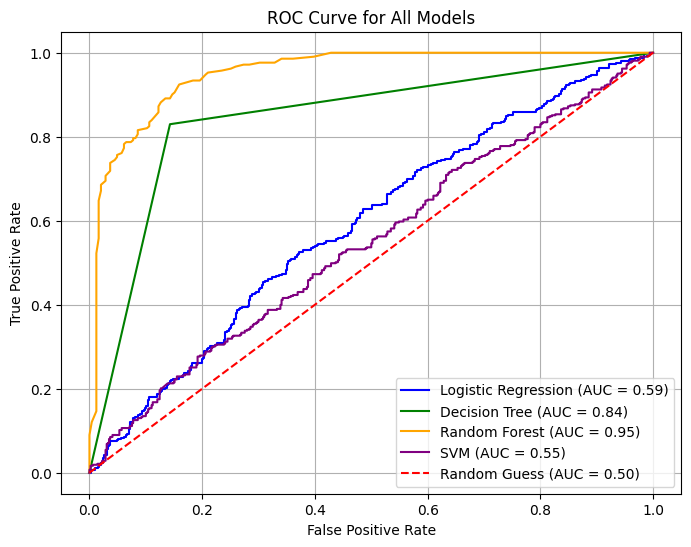

In [ ]:
# Obtener probabilidades de predicción para cada modelo
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_prob_svm = model_svm.predict_proba(X_test)[:, 1]
#y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Lista de probabilidades, nombres y colores
model_probs = [y_prob_lr, y_prob_dt, y_prob_rf, y_prob_svm]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]
colors = ['blue', 'green', 'orange', 'purple', 'cyan']

# Graficar todas las curvas ROC
plot_combined_roc_curve(y_test, model_probs, model_names, colors)
